In [1]:
import random
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from numba import njit, prange
import matplotlib.ticker as ticker
from matplotlib.ticker import FormatStrFormatter
from WoLF_lib import *

# Single run of WoLF-PHC

In [2]:
avg1, avg2, p_t = WoLF_PHC(0.3, 0.6, 0.1, 0.95, np.linspace(0,1,7), 500000)
edgew, focalp, t = edge_or_focal(0,0, p_t)



In [ ]:
x_values = range(len(avg2))

# Plot the array as a line graph
plt.plot(x_values, avg1)
plt.plot(x_values, avg2)

# Add labels and title
plt.xlabel('thousands')
plt.ylabel('Profitability')
plt.title('WoLF-PHC vs. WoLF-PHC')
plt.legend(['Player 1', 'Player 2'])

# Display the graph
plt.show()

# Profitability


In [ ]:
avg_prof, avg_prof_gain, edge, focal= run_sim_wolf(100, np.linspace(0,1,7))

In [ ]:
print("Edgeworth price cycles: ", edge)
print("Focal pricing: ", focal)

In [ ]:
fig, axs = plt.subplots(1, 1, figsize=(9,3))
fig.suptitle("Average 2-player per-firm profitability in {} different runs, k={}".format(10, 6))
axs.set_xlabel("t")
axs.set_ylabel("profitability")
xs = np.linspace(0, 500000, 499)
axs.set_ylim(0.00, 0.125+(0.125*0.05))
axs.hlines(0.125, xmin=xs[0], xmax=xs[-1], colors='red', linestyles='dashed', label='Joint profit maximizing')
axs.hlines(0.0611, xmin=xs[0], xmax=xs[-1], colors='blue', linestyles='dashed', label='Comp Benchmark')#konstant taget fra johanne og morten
axs.plot(xs, avg_prof, color="steelblue", label = "avg. profitability")
axs.legend()  # Show the legend to display the label of the newly added line
plt.show()

In [ ]:
avg_prof[498]

# Price cycles

In [ ]:
b, c, p= WoLF_PHC(0.3, 0.6, 0.1, 0.95, np.linspace(0,1,49), 500000)
p1 = p[0,499950:500000]
p2 = p[1,499950:500000]

plt.figure(figsize=(12, 3))
p0s2d = p1[np.arange(0, p1.size, 2)][:-1]
p1s2d = p2[np.arange(1, p2.size, 2)][:-1]

plt.xlabel("t")
plt.ylabel("price")
plt.plot(range(0, 48, 2), p0s2d , label="firm 0 prices", marker="o", color="yellowgreen", linestyle="dotted")
plt.plot(range(1, 48, 2), p1s2d, label="firm 1 prices", marker="o", color="purple", linestyle="dotted")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

## Assymetric information

In [ ]:
a,b,c=WoLF_PHC_asym(0.3, 0.6, 0.1, 0.95, np.linspace(0,1,7), 500000, 0.2)

In [ ]:
x_values = range(len(b))

# Plot the array as a line graph
plt.plot(x_values, a)
plt.plot(x_values, b)

# Add labels and title
plt.xlabel('thousands')
plt.ylabel('Profitability')
plt.title('WoLF-PHC vs. WoLF-PHC')
plt.legend(['Player 1', 'Player 2'])

# Display the graph
plt.show()

In [ ]:
avg_prof_asym, avg_prof_gain_asym, edge_asym, focal_saym = run_sim_wolf_asym(100, np.linspace(0,1,7), mu=0.2)

In [ ]:
avg_prof_asym[498]

In [ ]:
fig, axs = plt.subplots(1, 1, figsize=(9,3))
fig.suptitle("Average 2-player per-firm profitability in {} different runs, k={}, mu={}".format(10, 6, 0.025))
axs.set_xlabel("t")
axs.set_ylabel("profitability")
xs = np.linspace(0, 500000, 499)
axs.set_ylim(0.00, 0.125+(0.125*0.05))
axs.hlines(0.125, xmin=xs[0], xmax=xs[-1], colors='red', linestyles='dashed', label='Joint profit maximizing')
axs.hlines(0.0611, xmin=xs[0], xmax=xs[-1], colors='blue', linestyles='dashed', label='Comp Benchmark')#konstant taget fra johanne og morten
axs.plot(xs, avg_prof, color="steelblue", label = "avg. profitability")
axs.plot(xs, avg_prof_asym, color="red", label = "avg. profitability asymmetric")
axs.legend()  # Show the legend to display the label of the newly added line
plt.show()

In [10]:
avg_prof_asym[498]

0.10968280022446793

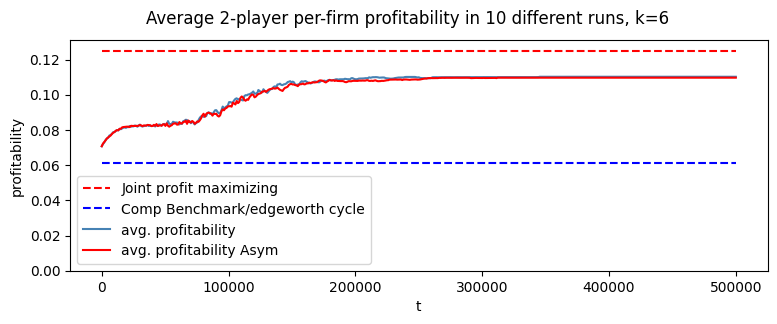

In [11]:
fig, axs = plt.subplots(1, 1, figsize=(9,3))
fig.suptitle("Average 2-player per-firm profitability in {} different runs, k={}".format(10, 6))
axs.set_xlabel("t")
axs.set_ylabel("profitability")
xs = np.linspace(0, 500000, 499)
axs.set_ylim(0.00, 0.125+(0.125*0.05))
axs.hlines(0.125, xmin=xs[0], xmax=xs[-1], colors='red', linestyles='dashed', label='Joint profit maximizing')
axs.hlines(0.0611, xmin=xs[0], xmax=xs[-1], colors='blue', linestyles='dashed', label='Comp Benchmark/edgeworth cycle')#konstant taget fra johanne og morten
axs.plot(xs, avg_prof, color="steelblue", label = "avg. profitability")
axs.plot(xs, avg_prof_asym, color="red", label = "avg. profitability Asym")
axs.legend()  # Show the legend to display the label of the newly added line
plt.show()

In [12]:
avg_prof_asym[498]

0.10968280022446793

In [13]:
avg_prof[498]

0.11021141975308733

In [4]:
avg_prof_asym, avg_prof_gain_asym, edge_asym, focal_saym, profs1_asym, profs2_asym = run_sim_wolf_asym(1000, np.linspace(0,1,7), mu=0.05)

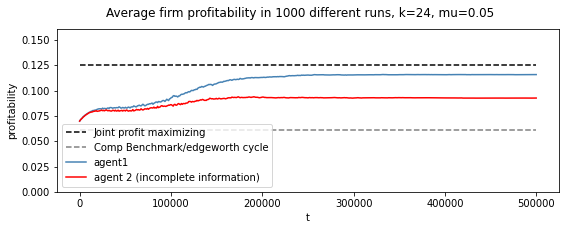

In [5]:
fig, axs = plt.subplots(1, 1, figsize=(9,3))
fig.suptitle("Average firm profitability in {} different runs, k={}, mu={}".format(1000, 24, 0.05))
axs.set_xlabel("t")
axs.set_ylabel("profitability")
xs = np.linspace(0, 500000, 499)
axs.set_ylim(0.00, 0.155+(0.125*0.05))
axs.hlines(0.125, xmin=xs[0], xmax=xs[-1], colors='black', linestyles='dashed', label='Joint profit maximizing')
axs.hlines(0.0611, xmin=xs[0], xmax=xs[-1], colors='grey', linestyles='dashed', label='Comp Benchmark/edgeworth cycle')#konstant taget fra johanne og morten
axs.plot(xs, profs1_asym, color="steelblue", label = "agent1")
axs.plot(xs, profs2_asym, color="red", label = "agent 2 (incomplete information)")

axs.legend()  # Show the legend to display the label of the newly added line
plt.show()